<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
import os

Подгрузили все необходимые библиотеки и инструменты

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')


Загрузили данные

In [3]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Изучили данные. Имеем пропуски и неверный формат столбца "date".

In [9]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [10]:
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%d %H:%M:%S')
test_df.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [11]:
full_df['date'] = pd.to_datetime(full_df['date'], format='%Y-%m-%d %H:%M:%S')
full_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

Изменили формат данных с "object" на "datetime"

In [12]:
print('Количество дубликатов в обучающей выборке=', train_df.duplicated().sum())
print('Количество дубликатов в тестовой выборке=',test_df.duplicated().sum())
print('Количество дубликатов в исходных данных=',full_df.duplicated().sum())

Количество дубликатов в обучающей выборке= 0
Количество дубликатов в тестовой выборке= 0
Количество дубликатов в исходных данных= 0


Дубликатов нет

In [13]:
size_of_train_df_before = train_df.shape
size_of_test_df_before = test_df.shape
size_of_full_df_before = full_df.shape
train_df = train_df.ffill(axis=0)
test_df = test_df.ffill(axis=0)
full_df = full_df.ffill(axis=0)
print(f'\nРазмер тренировочной выборки - {size_of_train_df_before} и количество строк без пропусков - {len(train_df.notna())}')
print(f'\nРазмер тестовой выборки - {size_of_test_df_before} и количество строк без пропусков - {len(test_df.notna())}')
print(f'\nРазмер исходной выборки - {size_of_full_df_before} и количество строк без пропусков - {len(full_df.notna())}')


Размер тренировочной выборки - (14149, 87) и количество строк без пропусков - 14149

Размер тестовой выборки - (5290, 53) и количество строк без пропусков - 5290

Размер исходной выборки - (19439, 87) и количество строк без пропусков - 19439


Учитывая, что данные индексируются датой и временем получения информации, а соседние по времени параметры часто похожи, избавились от пропусков.

In [14]:
c = train_df['rougher.output.concentrate_au']
f = train_df['rougher.input.feed_au']
t = train_df['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
print('MAE -', mean_absolute_error(train_df['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


Проверили формулу эффективности обогащения.Найшли MAE между полученными значениями и значением признака. Значение небольшое. Значит расчеты правильные.

In [15]:
missed_signs = set(train_df.columns) - set(test_df.columns)
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [16]:
print('Количество отсутствующих признаков -', len(missed_signs))

Количество отсутствующих признаков - 34


In [17]:
dict_with_name_of_values = {'final': 'финальные характеристики',
                           'primary_cleaner': 'первичная очистка',
                           'secondary_cleaner': 'вторичная очистка',
                           'input': 'параметры сырья',
                           'output': 'параметры продукта',
                           'rougher': 'флотация',
                           'state': 'параметры, характеризующие текущее состояние этапа',
                           'calculation': 'расчётные характеристики'}

In [18]:
dict_for_missed_signs = {}
for sign in missed_signs:
    list_with_words = sign.split('.')
    stage = list_with_words[0]+'-'+list_with_words[1]
    if stage in dict_for_missed_signs:
        dict_for_missed_signs[stage].append(list_with_words[2])
    elif stage not in dict_for_missed_signs:
        dict_for_missed_signs[stage] = [list_with_words[2]]
for key in dict_for_missed_signs.keys():
    split_key = key.split('-')
    
    print( f'ДЛЯ ЭТАПА "{(dict_with_name_of_values[split_key[0]]).upper()}" С ОПЦИЕЙ "{(dict_with_name_of_values[split_key[1]]).upper()}" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:')
     
    for elem in dict_for_missed_signs[key]:
        print(f' - {elem}')

ДЛЯ ЭТАПА "ПЕРВИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - concentrate_pb
 - tail_ag
 - concentrate_sol
 - concentrate_au
 - tail_pb
 - concentrate_ag
 - tail_au
 - tail_sol
ДЛЯ ЭТАПА "ФИНАЛЬНЫЕ ХАРАКТЕРИСТИКИ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_sol
 - concentrate_sol
 - recovery
 - tail_au
 - tail_ag
 - concentrate_au
 - tail_pb
 - concentrate_pb
 - concentrate_ag
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_pb
 - recovery
 - tail_ag
 - tail_au
 - tail_sol
 - concentrate_ag
 - concentrate_pb
 - concentrate_au
 - concentrate_sol
ДЛЯ ЭТАПА "ВТОРИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_sol
 - tail_ag
 - tail_pb
 - tail_au
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "РАСЧЁТНЫЕ ХАРАКТЕРИСТИКИ" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - au_pb_ratio
 - sulfate_to_au_concentrate
 - floatbank11_sulfate_to_au_feed
 - floatbank10_sulfate_to_au_feed


Проанализировали признаки, недоступные в тестовой выборке.В основном в тестовой выборке отсутствуют значения типа "параметры продукта", и в меньшем количестве (4 штуки) значения типа "расчетные характеристики". Отсутствие признаков можно обьяснить тем, что они замеряются и/или рассчитываются значительно позже (по условию задачи).
В тестовой выборки в том числе отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества. 

In [19]:
test_df = test_df.merge(full_df.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Добавили целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества в тестовую выборку (данные индексируются датой и временем получения информации)

In [20]:
train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

Удалили колонку date. Она не требуется для дальнейшего обучения модели.

In [21]:
print('Размер тестовой выборки - {} \nРазмер тренировочной выборки - {}'.format(test_df.shape, train_df.shape))


Размер тестовой выборки - (5290, 54) 
Размер тренировочной выборки - (14149, 86)


<b>В подготовке данных:</b>

-Загрузили и изучили данные

-Был изменен тип данных для колонки date с object на datetime. 

-Пропуски в датасетах (тренировочная выборки и тестовая) были заполнены значениями предшествующими по времени (Так как в условии задачи сказано, что : "Соседние по времени параметры часто похожи").

-Проверена правильность расчета эффективности обогащения. МАЕ равно предельно малому значению (отличие предсказаний от истинных значений).

-В сравнение с тренировчной выборкой в тестовой отсутствуют 34 значения, это может быть связано с тем, что они замеряются и/или рассчитываются значительно позже.

-В тестовую выборку были добавлены целевые признаки (rougher.output.recovery, final.output.recovery), которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.

-Колонка date была удалена как не информативна для дальнейшего обучения модели.

## Анализ данных

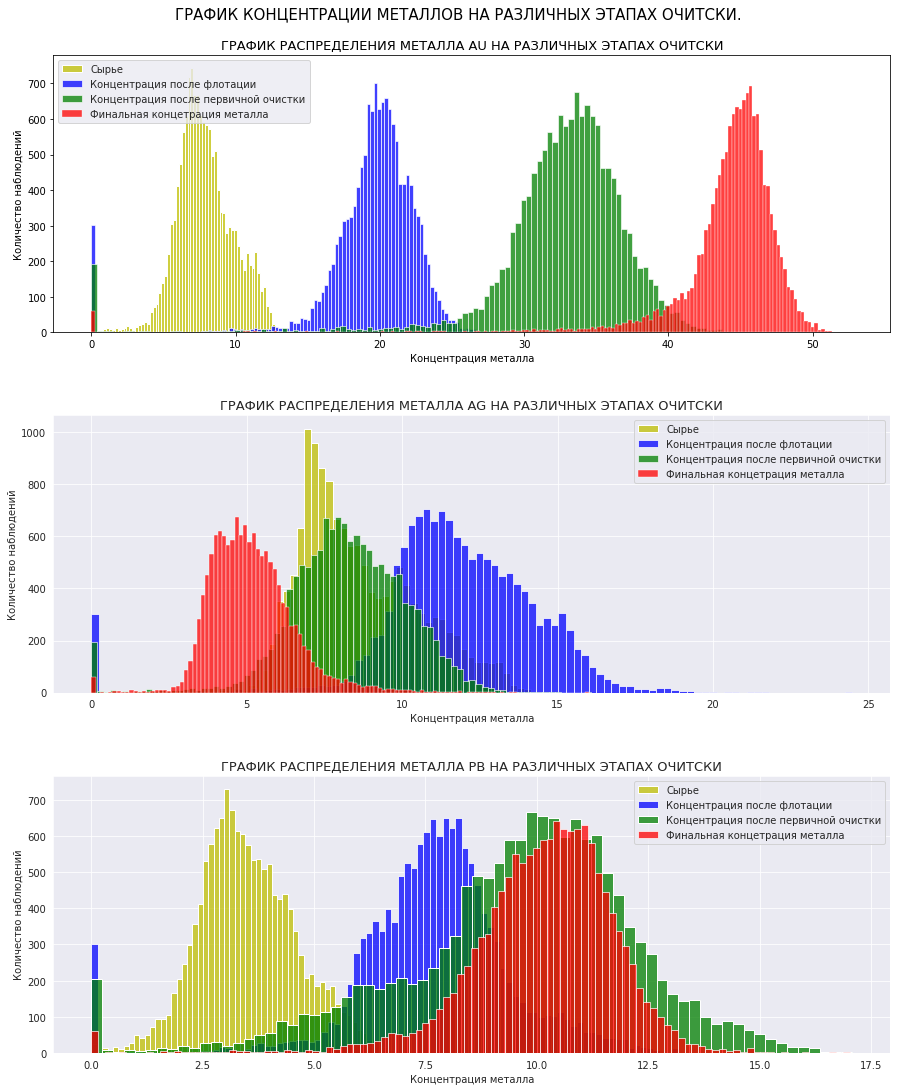

In [22]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК КОНЦЕНТРАЦИИ МЕТАЛЛОВ НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ.', fontsize=15)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_df[f'rougher.input.feed_{metal}'], color='y', label='Сырье', kde=False)
    sns.histplot(train_df[f'rougher.output.concentrate_{metal}'], color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(train_df[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(train_df[f'final.output.concentrate_{metal}'], color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

<b>Изучили изменения концентрации металлов на различных этапах очистки:</b>

- Доля золота на после каждого этапа очитски постепенно увеличивается
- Доля серебра увеличивается на этапе флотации, а затем постепенно уменьшается
- Доля свинца сначала увеличивается на этапе флотации и после первичной очитски, затем остатется примерно на одном уровне

Везде присутствуют аномалии

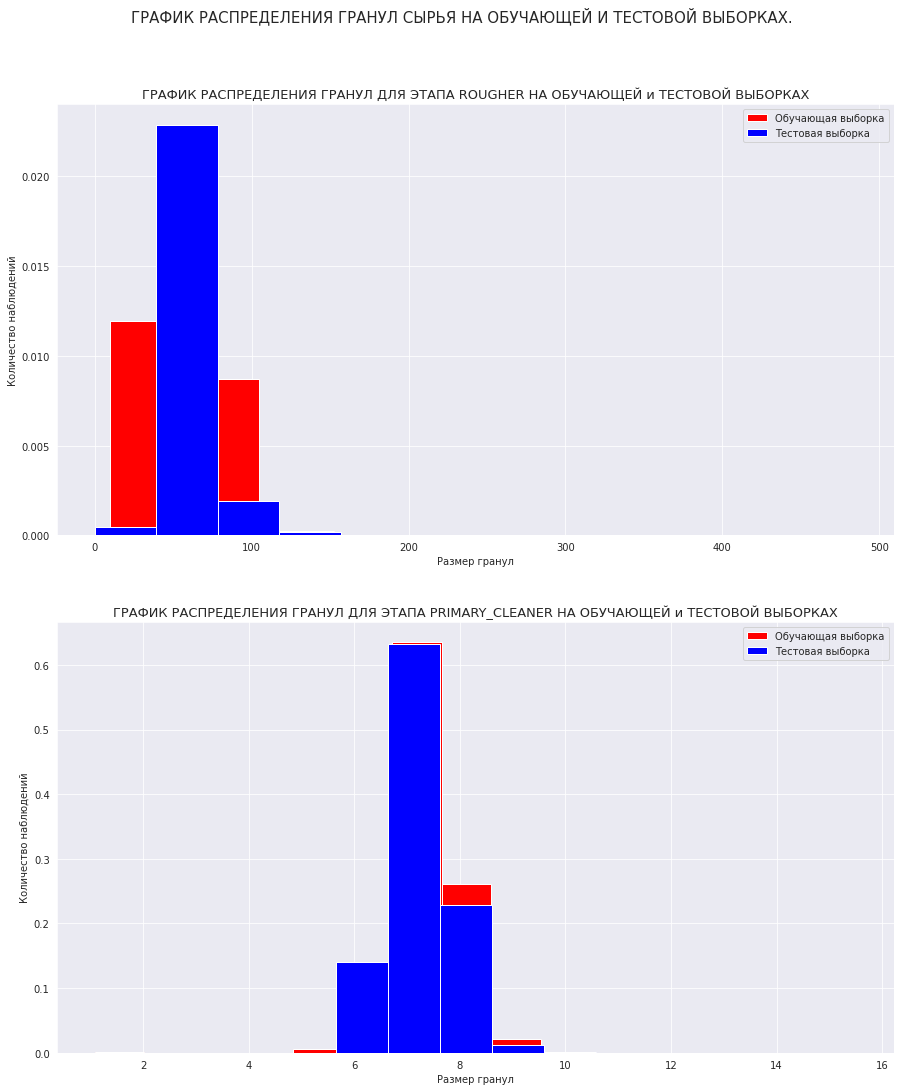

In [23]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ.', fontsize=15)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} НА ОБУЧАЮЩЕЙ и ТЕСТОВОЙ ВЫБОРКАХ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(train_df[f'{stage}.input.feed_size'], color='r', label='Обучающая выборка', density=True)
    plt.hist(test_df[f'{stage}.input.feed_size'], color='b', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

<b>Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках:</b>
    
-Для этапа флотации распределение гранул находится примерно в одинаковом диапазоне, но для тренировочной выборки преобладают гранулы с размером ~ 50 , а для тестовой наоборот, ниже порога 50

-Для этапа первичной очитски разспределение гранул для выборок находится в одном диапазоне, однако есть различия в количестве наблюдений. Так для тренировочной выборки количество наблюдений размера гранул больше, чем для тестовой

Значимых различий между распределениями для выборок не наблюдаем.

In [24]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += train_df[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += train_df[f'rougher.output.concentrate_{metal}']
#     sum_concentrate_of_primary_cleaner_output += full_df[f'primary_cleaner.output.concentrate_{metal}']
    sum_concentrate_of_final_output += train_df[f'final.output.concentrate_{metal}']


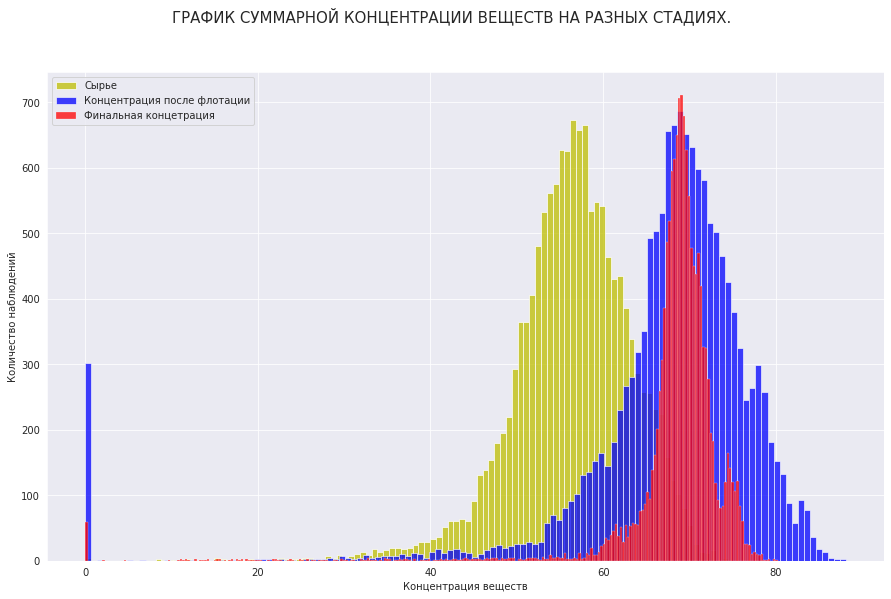

In [25]:
plt.figure(figsize=[15, 9])
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
# sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

Изучили суммарную концентрацию всех веществ на разных стадиях. Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.
    

In [26]:
train_df = train_df[(train_df['rougher.output.concentrate_au'] != 0) & (train_df['rougher.output.concentrate_ag'] != 0) & (train_df['rougher.output.concentrate_pb'] != 0) & (train_df['rougher.output.concentrate_sol'] != 0)]
train_df = train_df[(train_df['final.output.concentrate_au'] != 0) & (train_df['final.output.concentrate_ag'] != 0) & (train_df['final.output.concentrate_pb'] != 0) & (train_df['final.output.concentrate_sol'] != 0)]

full_df = full_df[(full_df['rougher.output.concentrate_au'] != 0) & (full_df['rougher.output.concentrate_ag'] != 0) & (full_df['rougher.output.concentrate_pb'] != 0) & (full_df['rougher.output.concentrate_sol'] != 0)]
full_df = full_df[(full_df['final.output.concentrate_au'] != 0) & (full_df['final.output.concentrate_ag'] != 0) & (full_df['final.output.concentrate_pb'] != 0) & (full_df['final.output.concentrate_sol'] != 0)]

Удалили аномалии для финального и этапа флотации для суммарной концентрации веществ. Они могут повлиять на качество обучения модели.

Вывод:

-Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют

-Доля золота увеличивается по мере прохождения этапов очистки

-В анализа суммарной концентрации веществ на разных стадиях были выявлены аномалии, которые были удалены для улучшения качества будущих моделей прогнозирования.

## Модель

In [27]:
signs_for_delete_without_target_signs = missed_signs - set(['rougher.output.recovery','final.output.recovery'])
print('Количество признаков для удаления из тренировочной выборки -', len(signs_for_delete_without_target_signs))

Количество признаков для удаления из тренировочной выборки - 32


Во избежание утечки целевого признака, необходимо удалить отсутствующие в тестовой выборке признаки (за исключением целевых признаков) из тренировочной выборке.

In [28]:
train_df = train_df.drop(columns=signs_for_delete_without_target_signs, axis=1)

Удалили.

Функция sMAPE

In [29]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

Пользовательский скорринг для кросс-валидации.

In [30]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

Функция итоговой sMAPE

In [31]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

In [32]:
features_for_train_df = train_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train_df = train_df['rougher.output.recovery']
target_for_final_on_train_df = train_df['final.output.recovery']

Подготовили данные для обучения.

In [33]:
dct_with_scores = {}

In [34]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train_df,
                          target_for_rougher_on_train_df,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_for_train_df,
                        target_for_final_on_train_df,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 886 ms, sys: 1.75 s, total: 2.64 s
Wall time: 2.58 s


Обучили Модель LinearRegression

In [43]:
state = RandomState(12345)

In [36]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train_df,
                              target_for_rougher_on_train_df,
                              scoring=smape_scorer,
                              cv=3, verbose=10, n_jobs=-1)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train_df,
                                  target_for_final_on_train_df,
                                  scoring=smape_scorer,
                                  cv=3, verbose=10, n_jobs=-1)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
              
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.787) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-7.781) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.914) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.391) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-10.092) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-11.489) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.098) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-6.004) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.346) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.937) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.411) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-13.278) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.592) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-6.990) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.056) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.389) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.551) total time=   0.2s
[CV] START .....................................................................
[CV] END .............................. score: (test=-14.640) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.489) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-7.429) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.435) total time=   0.2s
[CV] START .....................................................................
[CV] END .............................. score: (test=-10.839) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.903) total time=   0.2s
[CV] START .....................................................................
[CV] END .............................. score: (test=-13.542) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.573) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.192) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.054) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-12.753) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.946) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-14.760) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.422) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.314) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.877) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.874) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.383) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.569) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.143) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.036) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.593) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-12.439) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.329) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END .............................. score: (test=-13.272) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.146) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.619) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-8.830) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-13.611) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .............................. score: (test=-11.542) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END .............................. score: (test=-14.024) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.336) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.677) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.530) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-14.465) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .............................. score: (test=-11.775) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END .............................. score: (test=-13.911) total time=   0.4s
CPU times: user 12.3 s, sys: 75 ms, total: 12.4 s
Wall time: 12.6 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Обучили Модель DecisionTreeRegressor

In [37]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0

for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train_df,
                                  target_for_rougher_on_train_df,
                                  scoring=smape_scorer,
                                  cv=3, verbose=10, n_jobs=-1)

        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_for_train_df,
                                target_for_final_on_train_df,
                                scoring=smape_scorer,
                                cv=3, verbose=10, n_jobs=-1)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
            
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.563) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ............................... score: (test=-5.812) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.576) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.375) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.200) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END .............................. score: (test=-11.417) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.850) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END ............................... score: (test=-7.121) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.531) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.314) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.769) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] END .............................. score: (test=-13.839) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.998) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] END ............................... score: (test=-6.948) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ............................... score: (test=-8.419) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.447) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.965) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.179) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.921) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.669) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.866) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.579) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] END .............................. score: (test=-11.088) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.492) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.543) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-5.849) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] END ............................... score: (test=-8.486) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.303) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.891) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV] END .............................. score: (test=-11.434) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.941) total time=   4.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.860) total time=   4.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.548) total time=   4.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.175) total time=   4.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.642) total time=   4.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV] END .............................. score: (test=-13.688) total time=   4.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.877) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV] END ............................... score: (test=-6.893) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.7s remaining:    0.0s


[CV] END ............................... score: (test=-8.214) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.187) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.483) total time=   6.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


[CV] END .............................. score: (test=-12.315) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.921) total time=   8.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.657) total time=   7.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.618) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.541) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.756) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


[CV] END .............................. score: (test=-12.175) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.542) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.843) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.341) total time=   4.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.249) total time=   4.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.837) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] END .............................. score: (test=-11.508) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.959) total time=   7.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] END ............................... score: (test=-6.804) total time=   7.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.510) total time=   7.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.131) total time=   7.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.666) total time=   7.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s


[CV] END .............................. score: (test=-13.850) total time=   7.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.866) total time=  11.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] END ............................... score: (test=-7.101) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.339) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.105) total time=  10.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.513) total time=  10.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.260) total time=  11.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.801) total time=  13.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.872) total time=  13.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.808) total time=  13.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.306) total time=  14.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.759) total time=  13.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[CV] END .............................. score: (test=-12.258) total time=  14.2s
CPU times: user 6min 16s, sys: 1.41 s, total: 6min 18s
Wall time: 6min 19s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.1s finished


Обучили Модель RandomForestRegressor

In [38]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.059261443482796

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 10.033081836886833

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 9.62572958515532


Лучшая модель - RandomForestRegressor

In [39]:
print('\nЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))



ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - 70, MAX_DEPTH - 2


In [40]:
features_for_test_df = test_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test_df = test_df['rougher.output.recovery']
target_for_final_on_test_df = test_df['final.output.recovery']
   

model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
predicted_rougher = model_for_test_rougher.predict(features_for_test_df)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_final.fit(features_for_train_df, target_for_final_on_train_df)
predicted_final = model_for_test_final.predict(features_for_test_df)

smape_for_test_rougher = get_smape(target_for_rougher_on_test_df, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test_df, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)
    

print(f'SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - {final_smape_for_test}')

SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - 9.504033186609172


In [41]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
dummy_regr_for_final.fit(features_for_train_df, target_for_final_on_train_df)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test_df)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test_df)

smape_for_const_rougher = get_smape(target_for_rougher_on_test_df, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test_df, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)


In [42]:
print(f'ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')

ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027


Показатель модели RandomForestRegressor намного меньше показателя константной, что означает хорошее качество полученной модели.

Признаки, отсутствующие в тестовой выборке, были удалены из тренировочной выборки в избежание утечки целевого признака, что могло навредить качеству обучения моделей.

Лучшая модель - RandomForestRegressor

Модель проверена на адекватность, ее показатель SMAPE намного меньше показателя константной модели.


Моделью с лучшими результатами прогноза является - RandomForestRegressor

Модель проверена на адекватность.

В процессе обработки данных были удалены аномальные значения и проверено распределение веществ для обучающей и тестовой выборки.

Установленно, что мере прохождения стадий технологического процесса доля золота и свинца увеличичвается, а серебра уменьшается. Общее суммарное количество веществ снижается по мере прохождения этапов обработки.